### Student Information
Name:

Student ID:

GitHub ID:

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [150]:
import pandas as pd
import nltk
import numpy as np
import math
import helpers.data_mining_helpers as dhp

In [151]:
records = pd.read_csv('Reddit-stock-sentiment.csv')
data = pd.DataFrame(records)
data

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,comment,2021-06-30 4:06:06,h3iv6pq,stockstobuytoday,$MRIN Marin Software killed it today. Hope som...,Ordinary-Office9180,https://www.reddit.com/r/stockstobuytoday/comm...,1,NaN,NaN,Invest now it is going to shoot up tomorrow,0.000000,0.000000,0.0,['tomorrow'],1.0
843,comment,2025-04-11 5:01:24,mmijiuz,StockMarket,$ U.S. dollar value (crashing),lulububudu,https://i.redd.it/atvlo83gk4ue1.jpeg,2,NaN,NaN,Where can I read this?,0.000000,0.000000,0.0,[],0.0
844,post,2025-03-24 12:30:39,1jipi4v,stockstobuytoday,Analyst Recommendations,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.00,"Upgrades, Downgrades\n\n [Stock Analyst Recomm...",0.000000,0.000000,0.0,"['Analyst', 'Nasdaq', 'Stock', 'Upgrades', 'Do...",0.0
845,comment,2025-04-11 20:13:26,mmmely7,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,yes_ur_wrong,https://www.reddit.com/r/wallstreetbets/commen...,10,NaN,NaN,i sold my puts so i expect cheeto to declare w...,0.000000,0.000000,0.0,"['war', 'denmark', 'cheeto', 'i']",-1.0


In [154]:
# Check for duplicates
print(sum(data.duplicated()))

# Check for missing values
data.isnull().apply(lambda r: dhp.check_missing_values(r))

0


,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,The amount of missing records is:,The amount of missing records is:,The amount of missing records is:,The amount of missing records is:,The amount of missing records is:,The amount of missing records is:,The amount of missing records is:,The amount of missing records is:,The amount of missing records is:,The amount of missing records is:,The amount of missing records is:,The amount of missing records is:,The amount of missing records is:,The amount of missing records is:,The amount of missing records is:,The amount of missing records is:
1,0,0,0,0,0,0,0,0,783,783,0,0,0,0,0,0


In [155]:
processed_data = data.drop(columns=['type','datetime','subreddit','post_id','author','url','upvotes','downvotes','upvote_ratio','subjectivity'])
processed_data

# Sentiment depends on the texts and words used
# A context can have totally positive or negative sentiment while the subjectivity stays 1 (irrelevant)
# Upvotes reflect how others approve(like) or disapprove(dislike) the post/comment, which is also related to subjectivity

,title,text,polarity,sentiment,entities,label
0,Retardation is on the menu boys! WSB is so back,Calls on retards,-0.900000,-1.0,[],-1.0
1,Retail giant TARGET has now declined for 10 co...,Stunt as in like why did they even make a big ...,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,How do you feel about a sitting president maki...,Seeing lots of red in the ticker.,0.000000,0.0,['ticker'],0.0
3,Who knows more? $VMAR,Vision Marine Technologies Inc. is rewriting t...,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,The Trump administration is begging Xi Jinping...,He didn’t say thank you.,0.000000,0.0,[],-1.0
...,...,...,...,...,...,...
842,$MRIN Marin Software killed it today. Hope som...,Invest now it is going to shoot up tomorrow,0.000000,0.0,['tomorrow'],1.0
843,$ U.S. dollar value (crashing),Where can I read this?,0.000000,0.0,[],0.0
844,Analyst Recommendations,"Upgrades, Downgrades\n\n [Stock Analyst Recomm...",0.000000,0.0,"['Analyst', 'Nasdaq', 'Stock', 'Upgrades', 'Do...",0.0
845,Weekend Discussion Thread for the Weekend of A...,i sold my puts so i expect cheeto to declare w...,0.000000,0.0,"['war', 'denmark', 'cheeto', 'i']",-1.0


In [160]:
# A simple graph
import plotly.express as px

scount = processed_data['label'].value_counts()
simple_df = pd.DataFrame(scount.to_list(), index=scount.index, columns=['count'])

totalcount = len(processed_data)
maxcount = max(simple_df['count'])
ylim = math.ceil(maxcount/totalcount * 10) * (10 ** math.floor(math.log(totalcount,10)))

sfig = px.bar(simple_df,
              x=['neutral','negative','positive'],
              y=simple_df['count'],
              labels={'x': 'label'},
              range_y=[0, ylim],
              color=simple_df['count'],
              range_color=[0, ylim],
              width=400
             )

sfig.update_layout(title_text='Sentiment Label statistics', title_x=0.5)
sfig.show()

In [161]:
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords as sws
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mp5k1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [163]:
pos = list()
neg = list()
neu = list()

# After thinking twice, I decide to remove the stopwords because too many of them in the data
# They are comments and posts from Reddit. What do I expect?
stopwords = set(sws.words('english'))
stopwords.add('I')

for i in range(len(processed_data)):
    token_text = word_tokenize(processed_data.loc[i,'text'])
    for j in range(len(token_text)):
        token_word = wn.synsets(token_text[j])
        if len(token_text[j]) > 1 and len(token_word) > 1:
            if token_text[j] not in stopwords and token_word[0].pos() != 'r':
                senti = processed_data.loc[i,'label']
                if senti > 0:
                    pos.append(token_text[j])
                elif senti < 0:
                    neg.append(token_text[j])
                else:
                    neu.append(token_text[j])

# Adjectives have meanings on their own, although they are sometimes used for sarcasm (which I didn't put into account here)
# Adverbs derive from adjectives
# Nouns and verbs can have neutral meanings
# Take an live example from the dataset: retard
# Retard can be used to negatively describe or curse a person(a common case); it describes something that is being delayed in progress on the other hand
# Verb: declare war v.s declare independence
#
# As those being said, I did everything in a simple way here, hoping it's enough


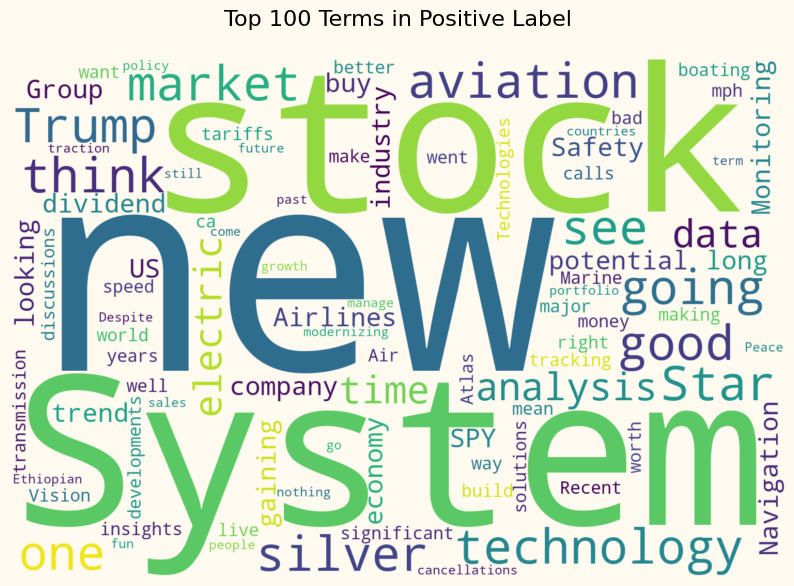

In [166]:
# Analysis attempt on the positive words
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from wordcloud import WordCloud

pos_frequency = pd.Series(pos).value_counts()
linefig = go.Figure(go.Scatter(x=pos_frequency[:250].index,
                               y=pos_frequency[:250].to_list(),
                               mode='markers',
                               line=dict(color='dodgerblue')))

linefig.update_layout(title=dict(text='[Positive Label] 250 Most Frequently Used Terms', x=0.5, font=dict(size=20)),
                      yaxis_title='frequency')
linefig.show()

# Top 20 words appeared in the positive data
# pie_colors = []
piefig = go.Figure(go.Pie(values=pos_frequency[:20].to_list(),
                          labels=pos_frequency[:20].index))

piefig.update_layout(width=600, title='Top 20 Terms in Positive Label', title_x=0.5)
piefig.update_traces(hoverinfo='label+value', textinfo='percent', textfont_size=14,
                     marker=dict(line=dict(color='black', width=0.5)))
piefig.show()

# Show top 100 positive words using Wordcloud
cloud_text = ' '.join(w for w in pos_frequency[:100].index.to_list())
pos_cloud = WordCloud(width=1500, height=1000, background_color='floralwhite').generate(cloud_text)
plt.figure(figsize=(10,8), facecolor='floralwhite')
plt.imshow(pos_cloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 100 Terms in Positive Label', y=1.05, fontsize=16)
plt.show()


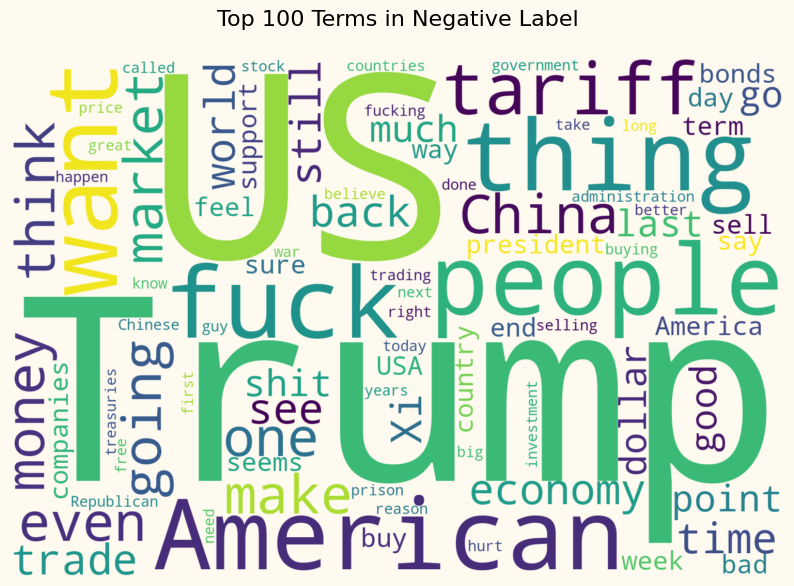

In [167]:
# Analysis attempt on the negative words
neg_frequency = pd.Series(neg).value_counts()
linefig = go.Figure(go.Bar(x=neg_frequency[:400].index,
                           y=neg_frequency[:400].to_list(),
                           width=0.7,
                           marker=dict(color='tomato')))

linefig.update_layout(title=dict(text='[Negative Label] 400 Most Frequently Used Terms', x=0.5, font=dict(size=20)),
                      yaxis_title='frequency')
linefig.show()

# Top 20 words appeared in the negative data
piefig = go.Figure(go.Pie(values=neg_frequency[:20].to_list(),
                          labels=neg_frequency[:20].index))

piefig.update_layout(width=600, title='Top 20 Terms in Negative Label', title_x=0.5)
piefig.update_traces(hoverinfo='label+value', textinfo='percent', textfont_size=14,
                     marker=dict(line=dict(color='black', width=0.5)))
piefig.show()

# Show top 100 negative words using Wordcloud
cloud_text = ' '.join(w for w in neg_frequency[:100].index.to_list())
neg_cloud = WordCloud(width=1500, height=1000, background_color='floralwhite').generate(cloud_text)
plt.figure(figsize=(10,8), facecolor='floralwhite')
plt.imshow(neg_cloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 100 Terms in Negative Label', y=1.05, fontsize=16)
plt.show()


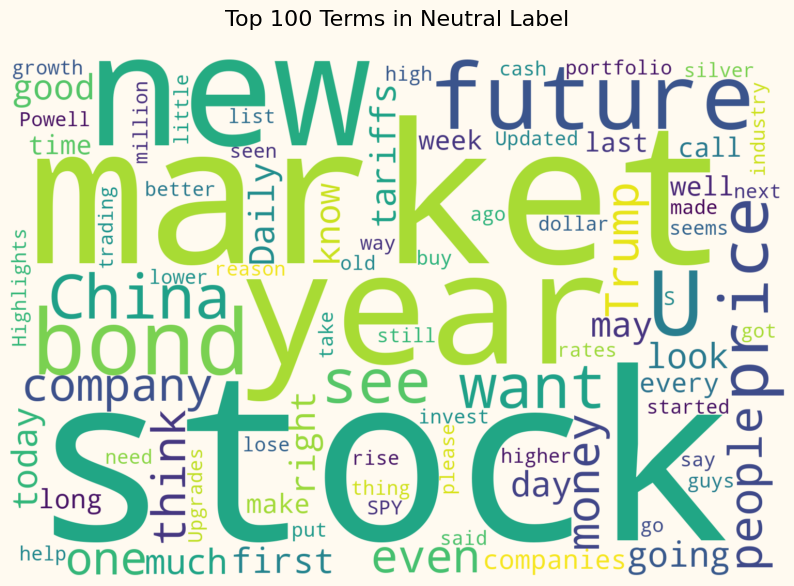

In [168]:
# Analysis attempt on the neutral words
neu_frequency = pd.Series(neu).value_counts()
linefig = go.Figure(go.Bar(x=neu_frequency[:300].index,
                           y=neu_frequency[:300].to_list(),
                           width=0.6,
                           marker=dict(color='gold')))

linefig.update_layout(title=dict(text='[Neutral Label] 300 Most Frequently Used Terms', x=0.5, font=dict(size=20)),
                      yaxis_title='frequency')
linefig.show()

# Top 20 words appeared in the neutral data
piefig = go.Figure(go.Pie(values=neu_frequency[:20].to_list(),
                          labels=neu_frequency[:20].index))

piefig.update_layout(width=600, title='Top 20 Terms in Neutral Label', title_x=0.5)
piefig.update_traces(hoverinfo='label+value', textinfo='percent', textfont_size=14,
                     marker=dict(line=dict(color='black', width=0.5)))
piefig.show()

# Show top 100 neutral words using Wordcloud
cloud_text = ' '.join(w for w in neu_frequency[:100].index.to_list())
neu_cloud = WordCloud(width=1500, height=1000, background_color='floralwhite').generate(cloud_text)
plt.figure(figsize=(10,8), facecolor='floralwhite')
plt.imshow(neu_cloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 100 Terms in Neutral Label', y=1.05, fontsize=16)
plt.show()


In [169]:
# Trying something new: N-grams
from nltk.util import ngrams

pos_2grams = pd.Series('-'.join(w) for w in ngrams(pos,2))
pos2gfreq = pos_2grams.value_counts().sort_values(ascending=False)
ylim = pos2gfreq.iloc[0] + math.ceil(math.log(pos2gfreq.iloc[0],10))

pos2g_fig = go.Figure(go.Scatter(x=pos2gfreq[:75].index,
                                 y=pos2gfreq[:75].to_list(),
                                 mode='lines+markers',
                                 line=dict(color='deepskyblue'),
                                 hovertemplate='%{x}<br>Occurence: %{y}<extra></extra>'))

pos2g_fig.update_layout(title=dict(text='[Positive Label] Top 75 2-grams', font=dict(size=20), x=0.5),
                        yaxis_title='frequency',
                        yaxis=dict(range=[0,ylim]),
                        xaxis=dict(tickangle=35))
pos2g_fig.show()

# I tried to utilize Wordcloud for illustrating these 2-gram words, but it turned out that the result wasn't satisfying

In [170]:
# Top 75 2-grams in negative label
neg_2grams = pd.Series('-'.join(w) for w in ngrams(neg,2))
neg2gfreq = neg_2grams.value_counts().sort_values(ascending=False)
ylim = neg2gfreq.iloc[0] + math.ceil(math.log(neg2gfreq.iloc[0],10))

neg2g_fig = go.Figure(go.Scatter(x=neg2gfreq[:75].index,
                                 y=neg2gfreq[:75].to_list(),
                                 mode='lines+markers',
                                 line=dict(color='orangered'),
                                 hovertemplate='%{x}<br>Occurence: %{y}<extra></extra>'))

neg2g_fig.update_layout(title=dict(text='[Negative Label] Top 75 2-grams', font=dict(size=20), x=0.5),
                        yaxis_title='frequency',
                        yaxis=dict(range=[0,ylim]),
                        xaxis=dict(tickangle=35))
neg2g_fig.show()


In [171]:
# Top 75 2-grams in neutral label
neu_2grams = pd.Series('-'.join(w) for w in ngrams(neu,2))
neu2gfreq = neu_2grams.value_counts().sort_values(ascending=False)
d = 10 ** math.floor(math.log(neu2gfreq.iloc[0],10))
ylim = math.ceil(neu2gfreq.iloc[0] / d) * d

neu2g_fig = go.Figure(go.Scatter(x=neu2gfreq[:75].index,
                                 y=neu2gfreq[:75].to_list(),
                                 mode='lines+markers',
                                 line=dict(color='hotpink'),
                                 hovertemplate='%{x}<br>Occurence: %{y}<extra></extra>'))

neu2g_fig.update_layout(title=dict(text='[Neutral Label] Top 75 2-grams', font=dict(size=20), x=0.5),
                        yaxis_title='frequency',
                        yaxis=dict(range=[0,ylim]),
                        xaxis=dict(tickangle=35))
neu2g_fig.show()


# Phase 2

In [ ]:
### Begin Assignment Here